### [멀리뛰기](https://school.programmers.co.kr/learn/courses/30/lessons/12914)

- 수식 세워 풀이

In [ ]:
def solution(n):
    answer = 1
    a = 0
    for i in range(1, n//2+1):
        v1 = 1
        v2 = 1
        for j in range(1, i+1):
            v1 *= n-j-a
            v2 *= j
        answer += v1 // v2
        a += 1
    return answer % 1234567

### [영어 끝말잇기](https://school.programmers.co.kr/learn/courses/30/lessons/12981)

In [ ]:
def solution(n, words):
    history = [words[0]]
    last = words[0][-1]
    for idx, word in enumerate(words[1:], start=2):
        first = word[0]
        if first == last and word not in history:
            history.append(word)
            last = word[-1]
        else:
            return [idx%n if idx%n else n, (idx+n-1)//n]
        
    return [0,0]

### [입국심사](https://school.programmers.co.kr/learn/courses/30/lessons/43238)

In [ ]:
def solution(n, times):
    # 가능한 최소 시간(min_time)은 1분, 
    # 가능한 최대 시간(max_time)은 가장 느린 심사관이 n명을 모두 심사한다고 가정했을 때 걸리는 시간
    left, right = 1, max(times) * n
    answer = right
    
    while left <= right:
        mid = (left + right) // 2  # 후보가 될 수 있는 중앙값(시간)
        
        # mid 시간 동안 심사할 수 있는 사람 수를 계산
        total = 0
        for t in times:
            total += mid // t
            if total >= n:  # 이미 모든 사람을 심사할 수 있으면 더 볼 필요 없음
                break
        
        # 만약 mid 시간 내에 n명을 모두 처리할 수 있다면, 
        # 시간을 더 줄여도 되는 가능성이 있으므로 right 조정
        if total >= n:
            answer = mid
            right = mid - 1
        # mid 시간 내에 n명을 모두 처리하지 못한다면, 시간을 늘려야 하므로 left 조정
        else:
            left = mid + 1
    
    return answer


### [멀리뛰기](https://school.programmers.co.kr/learn/courses/30/lessons/12914)

- 이전에 풀었던 방식

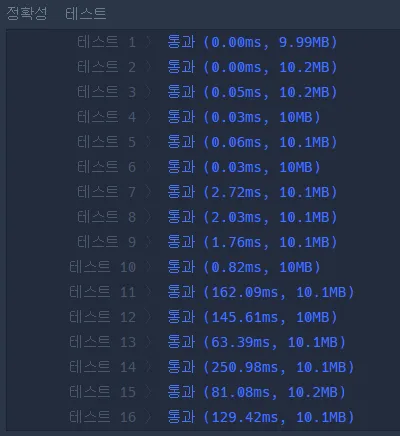

In [ ]:
def solution(n):
    answer = 1
    a = 0
    for i in range(1, n//2+1):
        v1 = 1
        v2 = 1
        for j in range(1, i+1):
            v1 *= n-j-a
            v2 *= j
        answer += v1 // v2
        a += 1
    return answer % 1234567


- 점화식을 이용해 최적 풀이
- dp[i]는 dp[i-1]에서 한 칸 뛰거나, dp[i-2]에서 두 칸 뛰는 방법이 존재하며  
  따라서 dp[i] = dp[i-1] + dp[i-2]

In [ ]:
def solution(n):
    MOD = 1234567

    dp = [0] * (n + 1)
    dp[0] = 1  
    dp[1] = 1  
    
    for i in range(2, n + 1):
        dp[i] = (dp[i - 1] + dp[i - 2]) % MOD
    
    return dp[n]

### [야근지수](https://school.programmers.co.kr/learn/courses/30/lessons/12927?language=python3)

In [ ]:
import heapq

def solution(n, works):    
    works = [-x for x in works]
    heapq.heapify(works)
    while n:
        target = heapq.heappop(works)
        target = min(0, target+1)
        heapq.heappush(works, target)
        n -= 1
    return sum([x**2 for x in works])